In [1]:
%run utils.ipynb

In [2]:
apparent_ranges = []
apparent_velocities = []
v_uas = []
r_uas = []


Unambiguous Range:13490.66061
Unambiguous Vel:749.481145
tensor([845.5742]) tensor([675.])
SNR Loss: -20.56057357788086 dB


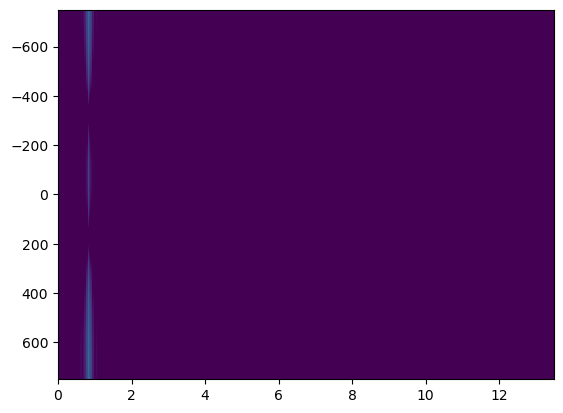

In [3]:
bandwidth = 10E6
pulse_duration = 10E-6
total_duration = 1e-4

fs =  2 * bandwidth
num_samples = int(np.ceil(total_duration * fs))
pulse_num_samples = int(np.ceil(pulse_duration*fs))

fc = 1E9

max_unamb_range = c * (total_duration - pulse_duration) / 2
max_unamb_vel = c / (4 * fc * total_duration)

r_uas.append(max_unamb_range)
v_uas.append(max_unamb_vel)


ranges=torch.Tensor([500E3])
velocities=torch.Tensor([675])
amplitudes = (torch.Tensor([1.0]) + 1j*torch.Tensor([0]))
n_pulses = 3

apparent_ranges.append(torch.fmod(ranges,max_unamb_range))
apparent_velocities.append(torch.fmod(velocities,max_unamb_vel))

print(f'Unambiguous Range:{max_unamb_range}')
print(f'Unambiguous Vel:{max_unamb_vel}')
print(torch.fmod(ranges,max_unamb_range), torch.fmod(velocities, max_unamb_vel))


mods_1 = (torch.fmod(ranges,max_unamb_range), torch.fmod(velocities, max_unamb_vel))


signal_1 = pulse(bandwidth, pulse_duration, num_samples, fs)
data1 = torch.zeros((n_pulses, num_samples), dtype=torch.complex64)
data1[:, :] = signal_1

nfft_range = 2 * data1.shape[1] - 1
nfft_doppler = 1024

scene = make_scene(amplitudes,ranges,velocities,max_unamb_range,max_unamb_vel,nfft_range,nfft_doppler)

scene1 = make_scene(amplitudes,torch.tensor([0]),torch.tensor([0]),max_unamb_range,max_unamb_vel,nfft_range,nfft_doppler)
s1 = simulate_target_with_scene_profile(data1, scene1,num_pulses=n_pulses)

coherent_gain = int(np.ceil(pulse_duration * fs)) * data1.shape[-2]

coherent_gain_db =  20*torch.log10(torch.Tensor([coherent_gain]))

X = simulate_target_with_scene_profile(data1, scene,num_pulses=n_pulses)

RDout = 20*torch.log10(1E-16 + torch.abs(doppler_processing(data1, X, nfft_range, nfft_doppler)))
RDout =  RDout - coherent_gain_db
plot1 = RDout
print(f'SNR Loss: {torch.max(RDout)} dB')
plt.imshow(RDout[0,:,nfft_range//2:],aspect='auto',extent=[0, max_unamb_range * 1E-3, max_unamb_vel,-max_unamb_vel])
plt.clim(-60,0)

Unambiguous Range:43469.90640999999
Unambiguous Vel:249.82704833333332
tensor([21831.0312]) tensor([175.3459])
SNR Loss: -30.10300064086914 dB


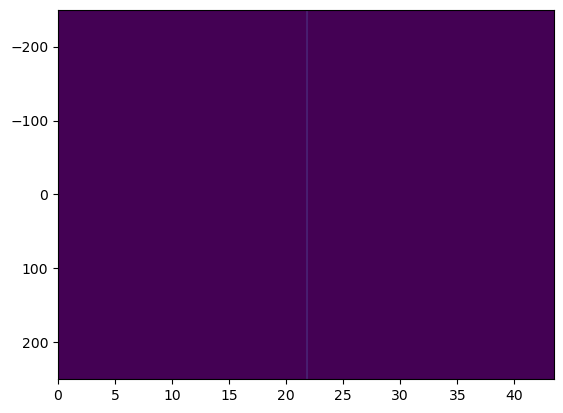

In [4]:
bandwidth = 10E6
pulse_duration = 10E-6
total_duration = 3E-4

fs =  2 * bandwidth
num_samples = int(np.ceil(total_duration * fs))
pulse_num_samples = int(np.ceil(pulse_duration*fs))

fc = 1E9

max_unamb_range = c * (total_duration - pulse_duration) / 2
max_unamb_vel = c / (4 * fc * total_duration)

r_uas.append(max_unamb_range)
v_uas.append(max_unamb_vel)


ranges=torch.Tensor([500E3])
velocities=torch.Tensor([675])
amplitudes = (torch.Tensor([1.0]) + 1j*torch.Tensor([0]))
n_pulses = 1

apparent_ranges.append(torch.fmod(ranges,max_unamb_range))
apparent_velocities.append(torch.fmod(velocities,max_unamb_vel))

print(f'Unambiguous Range:{max_unamb_range}')
print(f'Unambiguous Vel:{max_unamb_vel}')
print(torch.fmod(ranges,max_unamb_range), torch.fmod(velocities, max_unamb_vel))
mods_2 = (torch.fmod(ranges,max_unamb_range), torch.fmod(velocities, max_unamb_vel))

signal_2 = pulse(bandwidth, pulse_duration, num_samples, fs)
data2 = torch.zeros((n_pulses, num_samples), dtype=torch.complex64)
data2[:, :] = signal_2

nfft_range = 2 * data2.shape[1] - 1
nfft_doppler = 1024

scene = make_scene(amplitudes,ranges,velocities,max_unamb_range,max_unamb_vel,nfft_range,nfft_doppler)

coherent_gain = int(np.ceil(pulse_duration * fs)) * data2.shape[-2]

coherent_gain_db =  20*torch.log10(torch.Tensor([coherent_gain]))

X_2 = simulate_target_with_scene_profile(data2, scene,num_pulses=n_pulses)

scene2 = make_scene(amplitudes,torch.tensor([0]),torch.tensor([0]),max_unamb_range,max_unamb_vel,nfft_range,nfft_doppler)
s2 = simulate_target_with_scene_profile(data2, scene2,num_pulses=n_pulses)

RDout = 20*torch.log10(1E-16 + torch.abs(doppler_processing(data2, X_2, nfft_range, nfft_doppler)))
RDout =  RDout - coherent_gain_db
plot2 = RDout
print(f'SNR Loss: {torch.max(RDout)} dB')
plt.imshow(RDout[0,:,nfft_range//2:],aspect='auto',extent=[0, max_unamb_range * 1E-3, max_unamb_vel,-max_unamb_vel])
plt.clim(-60,0)
# plt.xlim(4,5)

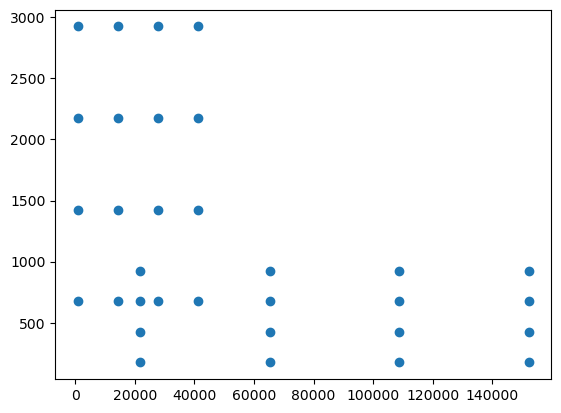

tensor([21831.0312,   425.1730])

In [5]:
resolve_range_ambiguity(4, apparent_ranges,  apparent_velocities,r_uas,v_uas)

In [6]:
echo  = merge_bursts([s1,s2] , [X, X_2], [0, 10 * pulse_num_samples])

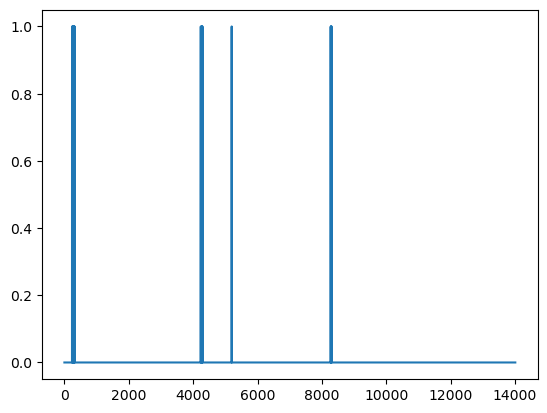

In [7]:
echo.shape
plt.plot(torch.abs(echo))
plt.show()

In [8]:
# add fillig pulses, depedning on maximum target range -> all targets have the same amount of pulses